In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

red = '#e8321b'
blue = '#1b69e8'

In [2]:
import os
import pandas as pd

In [16]:
path = '../sparse/pretraining_output-100k/eval_results_att.txt'

Load vocabulary

In [5]:
vocab = pd.read_csv('../sparse/sparse_tmp_vocab-code.txt', header=None)
vocab.shape

(1156, 1)

Load predictions results

In [7]:
results_df = pd.read_csv('../sparse/pretraining_output-100k/eval_results_masked_lm.txt')
results_df.head(10)

,masked_lm_predictions,label_ids,masked_lm_positions,0,1,2,3,4,5,6,...,54,55,56,57,58,59,60,61,62,63
0,53,53,11,2,6,111,127,7,576,1142,...,0,0,0,0,0,0,0,0,0,0
1,38,38,8,2,139,25,387,81,38,25,...,0,0,0,0,0,0,0,0,0,0
2,206,206,9,2,6,44,426,104,25,237,...,0,0,0,0,0,0,0,0,0,0
3,25,25,30,2,6,53,25,25,426,237,...,0,0,0,0,0,0,0,0,0,0
4,289,289,11,2,6,44,25,140,43,237,...,0,0,0,0,0,0,0,0,0,0
5,25,25,6,2,7,576,111,678,53,4,...,0,0,0,0,0,0,0,0,0,0
6,1142,1142,16,2,53,1142,193,25,253,426,...,0,0,0,0,0,0,0,0,0,0
7,25,25,14,2,398,253,426,426,426,426,...,0,0,0,0,0,0,0,0,0,0
8,53,53,34,2,57,58,59,107,59,42,...,0,0,0,0,0,0,0,0,0,0
9,25,25,12,2,398,38,38,53,1142,50,...,0,0,0,0,0,0,0,0,0,0


Get the prediction specific to this attention matrix

In [33]:
pred = list(results_df.loc[0][3:])
pred_str = [vocab.loc[i][0] for i in pred]
pred_str

['[CLS]',
 'if',
 'boolop',
 'and',
 'unaryop',
 'not',
 'attribute',
 'inputs',
 'name',
 'name',
 'expr',
 '[MASK]',
 'attribute',
 'build',
 'name',
 'name',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [9]:
# Actual sentence length, unpadded
emb_len = np.count_nonzero(pred)

In [10]:
print(' '.join(pred_str[:emb_len]))
print('Label =', vocab.loc[results_df.loc[0][0]][0])
print('Pred  =', vocab.loc[results_df.loc[0][1]][0])

[CLS] if boolop and unaryop not attribute inputs name name expr [MASK] attribute build name name
Label = call
Pred  = call


Read the attention values

In [17]:
ar = np.asarray(pd.read_csv(path, sep=' ', header=None))[:,:-1]
ar.shape

(12, 4096)

In [18]:
nb_heads = 12
seq_len  = 64
attention = ar.reshape((nb_heads, seq_len, seq_len))

Plot attention matrices

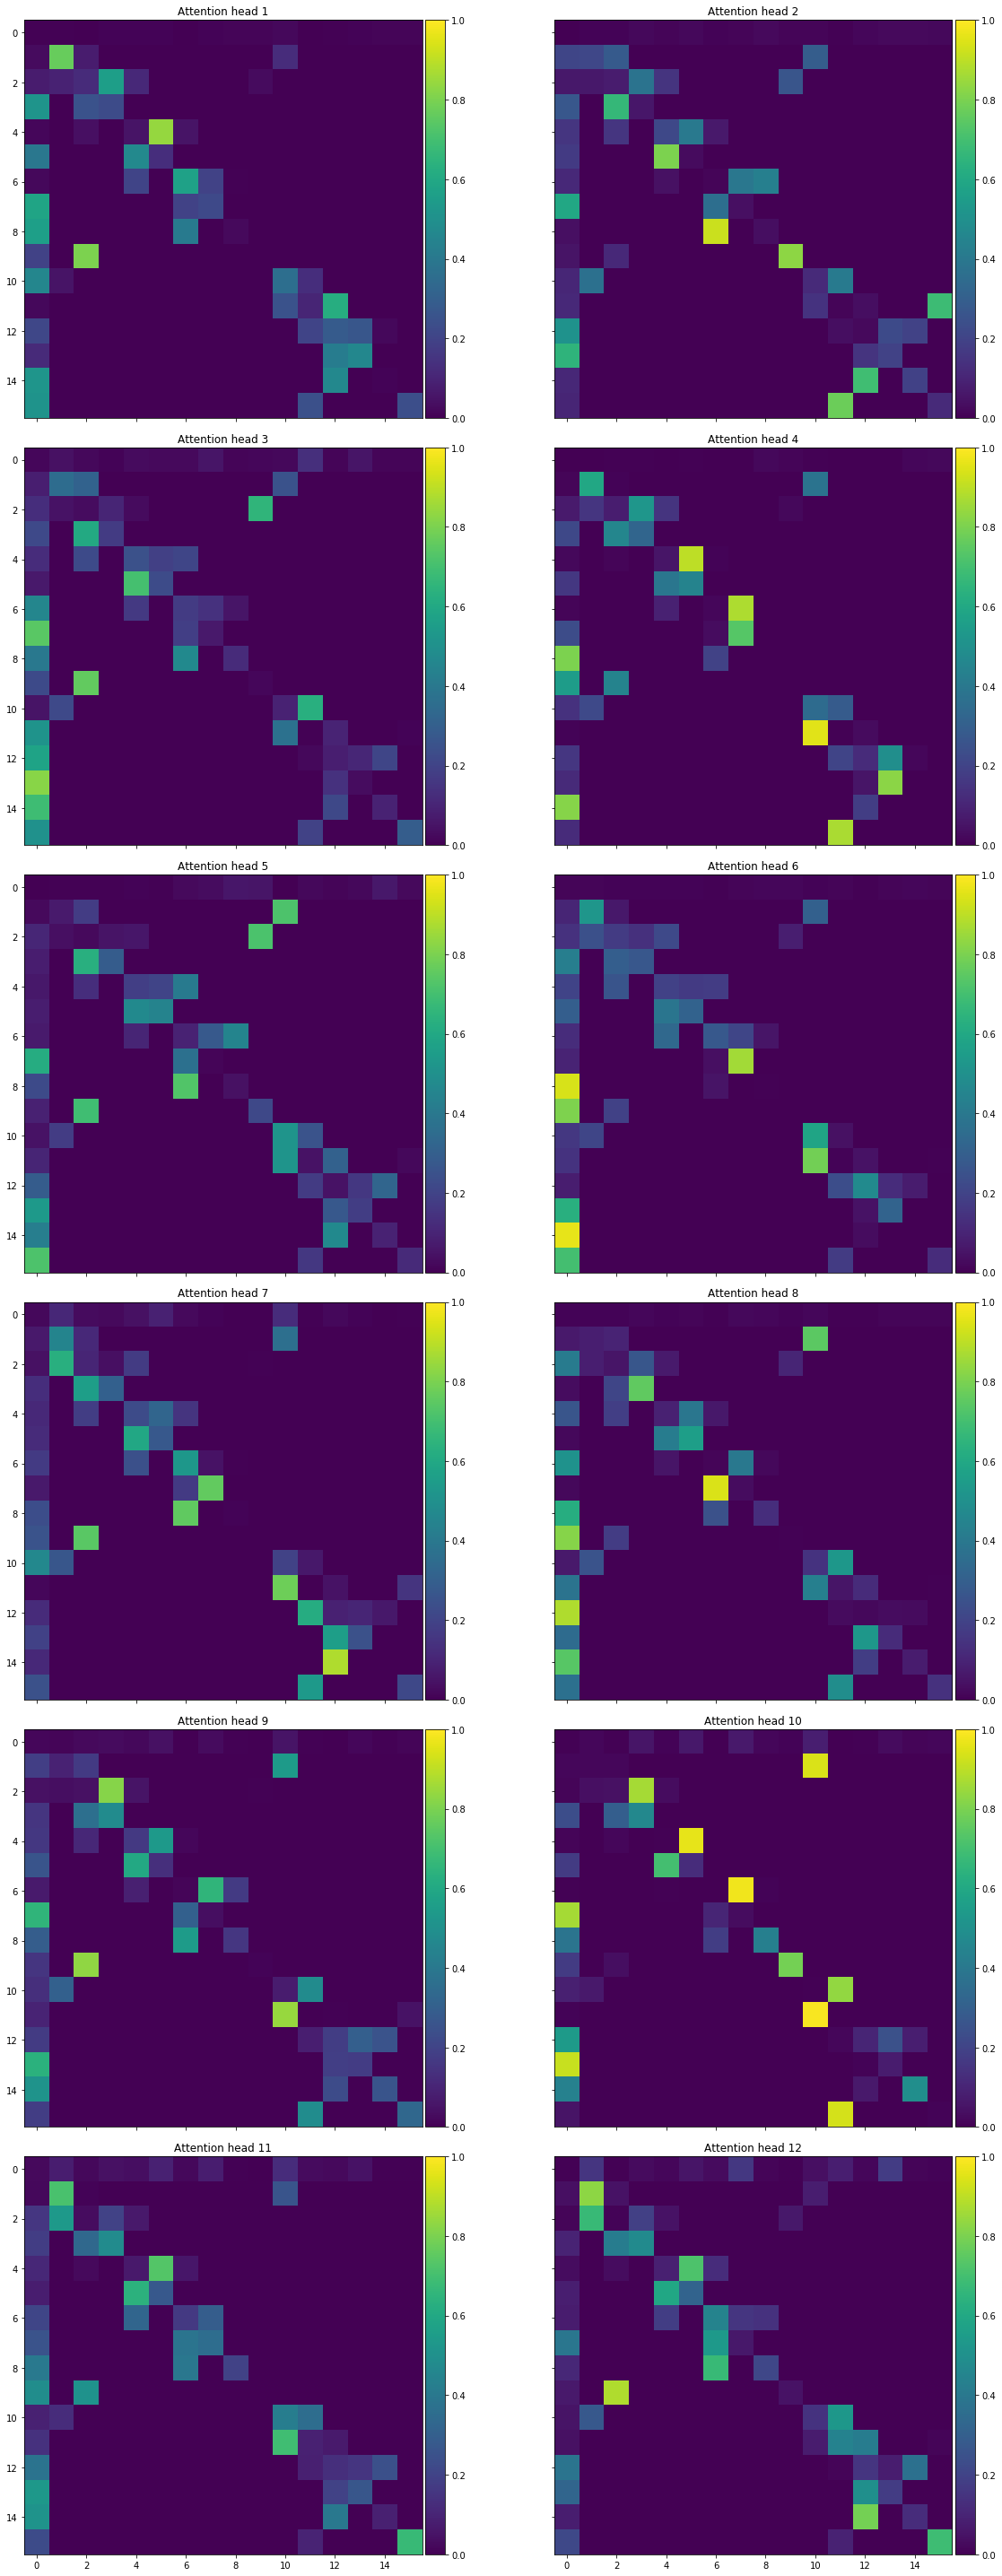

In [19]:
f, axes = plt.subplots(6, 2, sharex='col', sharey='row', figsize=(20,40))
#f.suptitle('Attention head probabilities (Layer #12)')
for i, ax in enumerate(axes.flatten()):
    im = ax.imshow(attention[i, :emb_len, :emb_len])
    ax.set_title("Attention head {}".format(i+1))
    im.set_clim(0, 1)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    f.colorbar(im, cax=cax, orientation='vertical')
    
    plt.tight_layout()
plt.show()

Load adjacency matrix

In [20]:
from scipy import io

In [34]:
m = io.mmread('../sparse/adj/'+str(0)+'_sparse_mlm_split_magret_adj_val.mtx')
A = m.toarray()
A.shape

(64, 64)

In [35]:
#adj_df = pd.read_csv('../funcname_magret/cls_with_funcsplit_magret_adj_single.txt', header=None)
#A = np.asarray(adj_df)

In [36]:
import networkx as nx

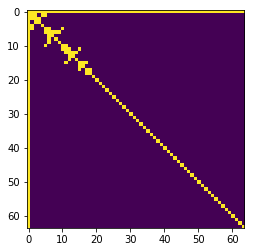

In [37]:
plt.imshow(A)

In [38]:
A[emb_len-1,:]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [51]:
G=nx.from_numpy_matrix(A[:emb_len,:emb_len])
#G.remove_node(0)

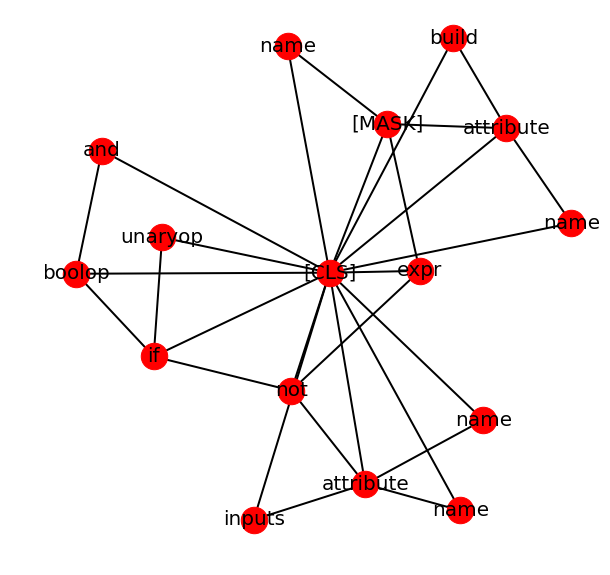

In [52]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)  # positions for all nodes
# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
# edges
nx.draw_networkx_edges(G, pos, width=2)
# labels
nx.draw_networkx_labels(G, pos, labels=dict(zip(range(emb_len),pred_str[:emb_len])), font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

In [49]:
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15))

In [45]:
G.remove_node(0)

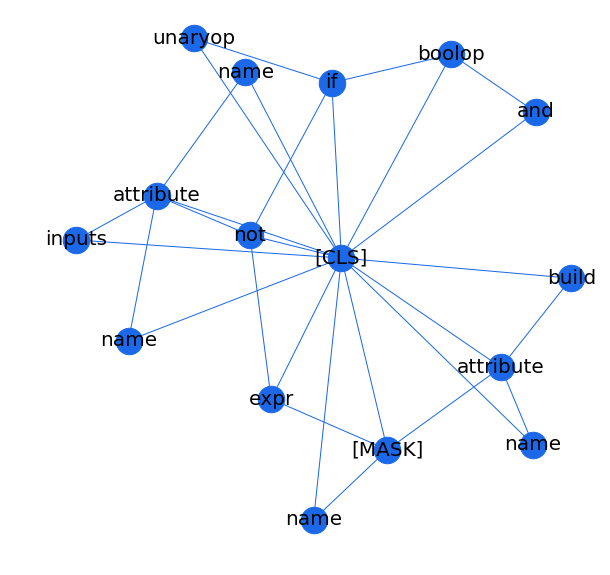

In [53]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)  # positions for all nodes
# nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color=blue)
# edges
nx.draw_networkx_edges(G, pos, width=1, edge_color=blue)
# labels
nx.draw_networkx_labels(G, pos, labels=dict(zip(range(emb_len),pred_str[:emb_len])), font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

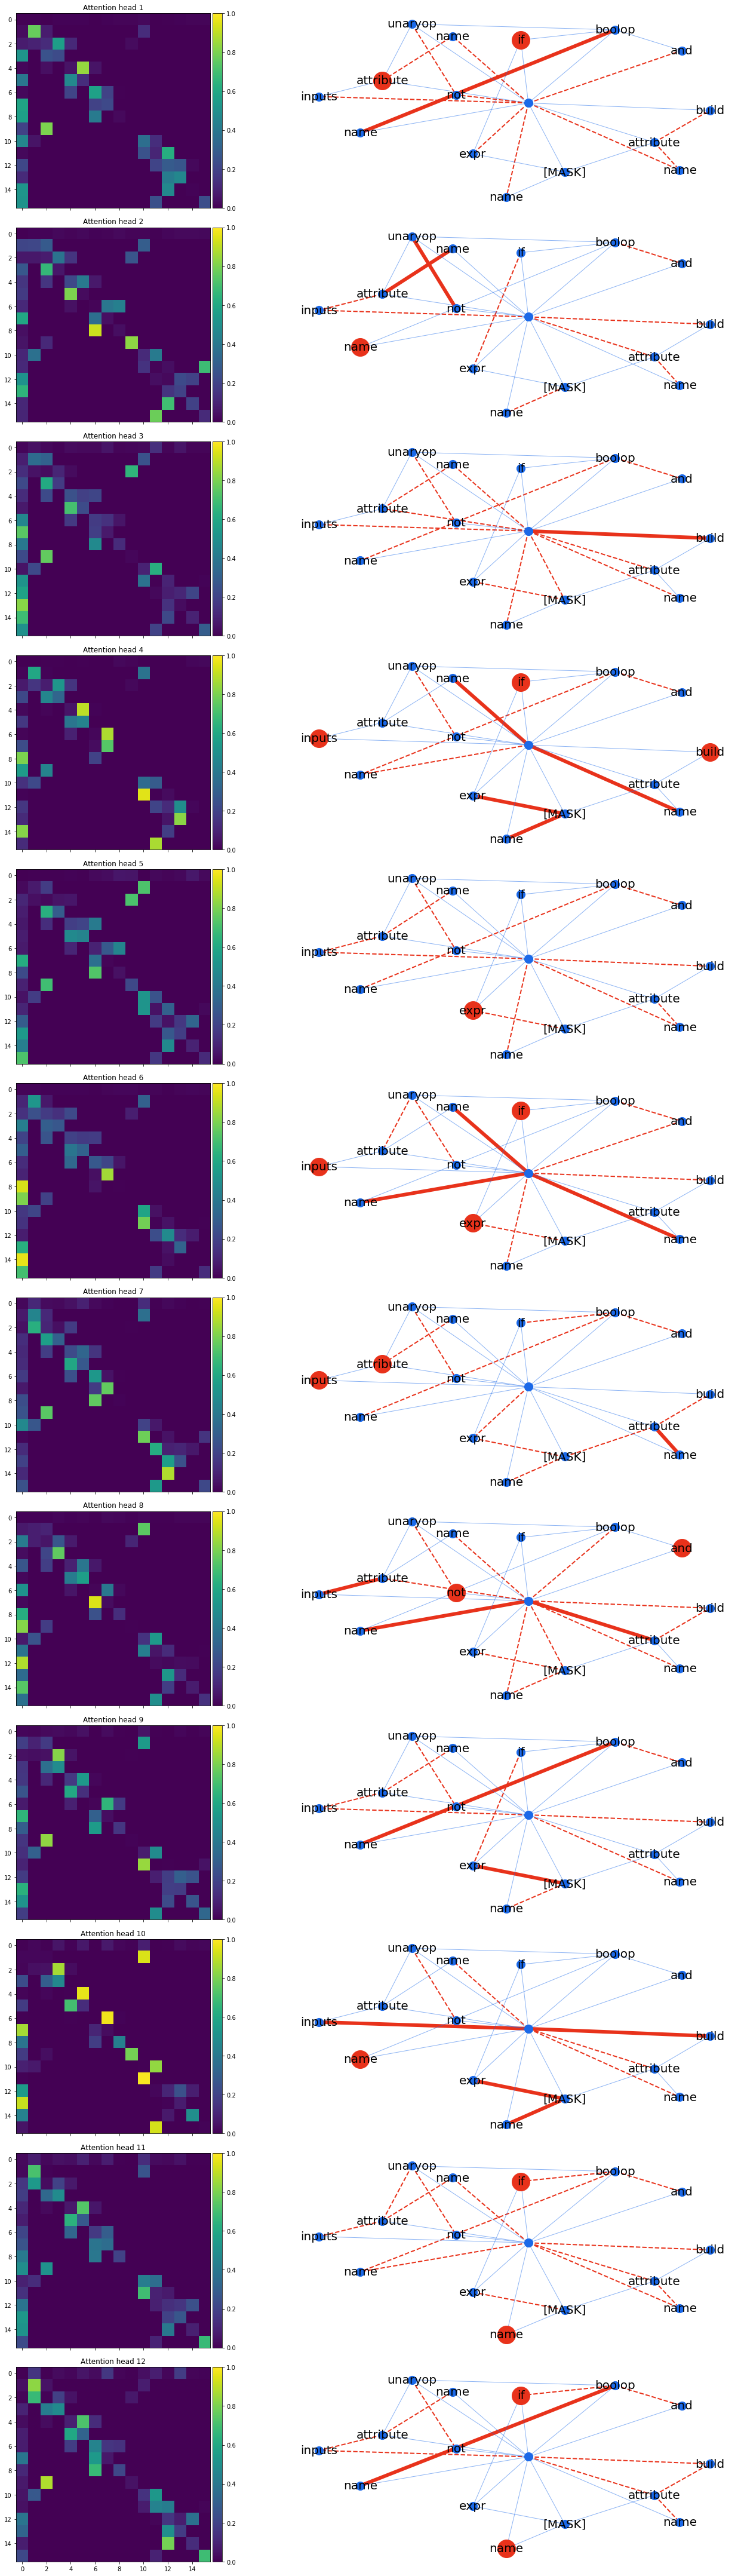

In [54]:
f, axes = plt.subplots(12, 2, sharex='col', figsize=(20,60))

#G0  = nx.from_numpy_matrix(attention[0, 1:emb_len, 1:emb_len])
#pos = nx.spring_layout(G0)  # positions for all nodes
labels = dict(zip(range(1,emb_len),pred_str[1:emb_len]))

#f.suptitle('Attention head probabilities (Layer #12)')
for i, (ax0, ax1) in enumerate(axes):
    # Attention map
    im = ax0.imshow(attention[i, :emb_len, :emb_len])
    ax0.set_title("Attention head {}".format(i+1))
    im.set_clim(0, 1)
    divider = make_axes_locatable(ax0)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    f.colorbar(im, cax=cax, orientation='vertical')
    
    # -----------------------------------------------------
    # graph
    Gi = nx.from_numpy_matrix(attention[i, :emb_len, :emb_len])
    #Gi.remove_node(0)
    
    evlarge = [(u, v) for (u, v, d) in Gi.edges(data=True) if  d['weight'] > 0.8]
    elarge  = [(u, v) for (u, v, d) in Gi.edges(data=True) if (d['weight'] > 0.3) & (d['weight'] <= 0.8)]
    esmall  = [(u, v) for (u, v, d) in Gi.edges(data=True) if  d['weight'] <= 0.3]
    
    lg_self_att = [u for (u,v,d) in Gi.edges(data=True) if (d['weight'] > 0.5) &(u==v)]
    sm_self_att = [u for (u,v,d) in Gi.edges(data=True) if (d['weight'] <= 0.5)&(u==v)]

    # nodes
    nx.draw_networkx_nodes(Gi, pos, nodelist=lg_self_att, node_size=900, ax=ax1, node_color=red)
    nx.draw_networkx_nodes(Gi, pos, nodelist=sm_self_att, node_size=200, ax=ax1, node_color=blue)

    # edges
    nx.draw_networkx_edges(Gi, pos, edgelist=evlarge, width=6, ax=ax1, edge_color=red)
    nx.draw_networkx_edges(Gi, pos, edgelist=elarge,  width=2, ax=ax1, edge_color=red, style='dashed')
    nx.draw_networkx_edges(Gi, pos, edgelist=esmall,  width=1, ax=ax1, alpha=0.5, edge_color=blue)

    # labels
    nx.draw_networkx_labels(Gi, pos, labels=labels, font_size=20, font_family='sans-serif', ax=ax1)

    ax1.axis('off')

    plt.tight_layout()
    
plt.show()